# Settings

In [1]:
import numpy as np
from scipy.optimize import linprog as lp
from matplotlib import pyplot as plt
%matplotlib inline

# System
## $Ax = b$

In [2]:
A = np.array([[1, 1, 2],
             [1, 1.1, 2],
             [0, 5, 0]])
mid_b = np.array([1.5, 5.5, 0])
rad_b = np.array([0.5, 0.5, 1])

# Optimization task
## size($A$) = $(n \times n)$

In [3]:
n = A.shape[0]
c = np.hstack([np.zeros(n), np.ones(n)])

neg_diag = -np.diag(rad_b)
r = np.hstack([-mid_b, mid_b])
A_big = np.block([[-A, neg_diag], [A, neg_diag]])

# Solve optimization task

In [4]:
bounds = [(None, None)] * n + [(0, None)] * n

res_simplex = lp(c, A_big, r, bounds=bounds,
                 method='simplex')
res_ip = lp(c, A_big, r, bounds=bounds,
            method='interior-point')

# Get solution & weights

In [5]:
# simplex

final_x = res_simplex.x[:-n]
final_w = res_simplex.x[n:]

print("Simplex results:")
print(f"X = {final_x}")
print(f"omegas = {final_w}")

# interior point

final_x = res_ip.x[:-n]
final_w = res_ip.x[n:]

print("Interior point results:")
print(f"X = {final_x}")
print(f"omegas = {final_w}")

Simplex results:
X = [0.   0.   2.75]
omegas = [8. 0. 0.]
Interior point results:
X = [ 6.47958218e-01 -4.76165773e-11  1.37813235e+00]
omegas = [3.80844585e+00 4.19155415e+00 9.34320173e-10]


# Convex combination

In [6]:
x_s = res_simplex.x[:-n]
w_s = res_simplex.x[n:]

x_ip = res_ip.x[:-n]
w_ip = res_ip.x[n:]

alpha = 0.5

x_conv = alpha * x_s + (1 - alpha) * x_ip
w_conv = alpha * w_s + (1 - alpha) * w_ip

print("Convex combination:")
print(f"X = {x_conv}")
print(f"omegas = {w_conv}")

Convex combination:
X = [ 3.23979109e-01 -2.38082887e-11  2.06406618e+00]
omegas = [5.90422292e+00 2.09577707e+00 4.67160087e-10]


# End to end function

In [7]:
def solve_bounded(x_bounds):
    bounds = x_bounds + [(0, None)] * n

    res_simplex = lp(c, A_big, r, bounds=bounds,
                     method='simplex')
    res_ip = lp(c, A_big, r, bounds=bounds,
                method='interior-point')
    omega_sum_s = sum(res_simplex.x[n:])
    omega_sum_ip = sum(res_ip.x[n:])
    omega_3 = res_simplex.x[-1]
    
    x_s = res_simplex.x[:-n]
    x_ip = res_ip.x[:-n]
    return omega_sum_s, omega_sum_ip, x_s, x_ip, omega_3

# Different $x_2$ bounds:

In [12]:
x_2 = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
x_1s = []
x_3s = []
x_1i = []
x_3i = []
w_3 = []

for lower in x_2:
    bounds = [(None, None), (lower, None), (None, None)]
    omega_sum_s, omega_sum_ip, x_s, x_ip, omega_3 = solve_bounded(bounds)
    print(f"Lower x_2 = {lower}: sum simplex = {omega_sum_s}, sum ip = {omega_sum_ip}, x_s = {x_s}, x_ip = {x_ip}, omega 3 = {omega_3}")
    x_1s.append(x_s[0])
    x_3s.append(x_s[-1])
    x_1i.append(x_ip[0])
    x_3i.append(x_ip[-1])
    #w_3.append(omega_3)
    
(x_1s, x_2, x_3s, x_1i, x_3i, w_3) = (np.array(x) for x in (x_1s, x_2, x_3s, x_1i, x_3i, w_3))

Lower x_2 = 0.1: sum simplex = 8.48, sum ip = 8.48000000000047, x_s = [0.    0.1   2.695], x_ip = [0.64999921 0.1        1.34268231], omega 3 = 0.5
Lower x_2 = 0.2: sum simplex = 8.96, sum ip = 8.96000000000047, x_s = [0.   0.2  2.64], x_ip = [0.62972504 0.2        1.30464674], omega 3 = 1.0
Lower x_2 = 0.3: sum simplex = 9.44, sum ip = 9.439999986377956, x_s = [0.    0.3   2.585], x_ip = [0.61346312 0.3        1.265681  ], omega 3 = 1.5
Lower x_2 = 0.4: sum simplex = 9.919999999999998, sum ip = 9.919999981647036, x_s = [0.   0.4  2.53], x_ip = [0.59803407 0.40000001 1.22666073], omega 3 = 2.0
Lower x_2 = 0.5: sum simplex = 10.4, sum ip = 10.400000002521292, x_s = [0.    0.5   2.475], x_ip = [0.58267923 0.5        1.18762389], omega 3 = 2.5
Lower x_2 = 0.6: sum simplex = 10.879999999999999, sum ip = 10.880000012932094, x_s = [0.   0.6  2.42], x_ip = [0.56576468 0.60000001 1.14824962], omega 3 = 3.0
Lower x_2 = 0.7: sum simplex = 11.360000000000001, sum ip = 11.360000006467066, x_s = [0

# Plot $x_1(x_2)$ & $x_3(x_2)$
## Simplex

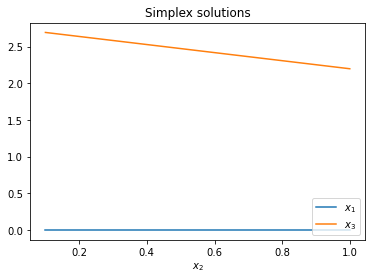

In [13]:
line1, = plt.plot(x_2, x_1s, label='$x_1$')
line2, = plt.plot(x_2, x_3s, label='$x_3$')
plt.legend(handles=[line1, line2], loc='lower right')
plt.title('Simplex solutions')
plt.xlabel('$x_2$')
plt.savefig('simplex.png')
plt.show()
plt.close()

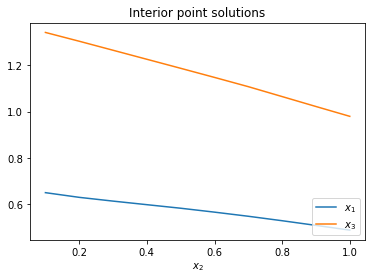

In [14]:
line1, = plt.plot(x_2, x_1i, label='$x_1$')
line2, = plt.plot(x_2, x_3i, label='$x_3$')
plt.legend(handles=[line1, line2], loc='lower right')
plt.title('Interior point solutions')
plt.xlabel('$x_2$')
plt.savefig('interior_point.png')
plt.show()
plt.close()

## Plot both

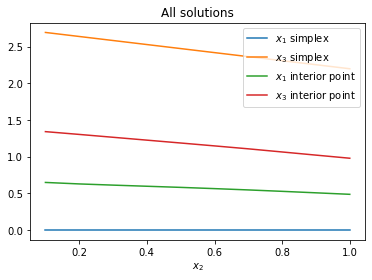

In [16]:
line1, = plt.plot(x_2, x_1s, label='$x_1$ simplex')
line2, = plt.plot(x_2, x_3s, label='$x_3$ simplex')
line3, = plt.plot(x_2, x_1i, label='$x_1$ interior point')
line4, = plt.plot(x_2, x_3i, label='$x_3$ interior point')
plt.legend(handles=[line1, line2, line3, line4], loc='upper right')
plt.title('All solutions')
plt.xlabel('$x_2$')
plt.savefig('all.png')
plt.show()
plt.close()